In [2]:
import math
import numpy as np
import random as random
import matplotlib.pyplot as plt
import pandas as pd
import csv
import os
import glob
import warnings
import tarfile
warnings.filterwarnings("ignore")

mainDir = os.getcwd()
print(mainDir)

C:\Users\eilyness


In [12]:
dataDir = mainDir + "/data/"
os.chdir(dataDir)

filename = 'ngims_derivedL2_2022.tar.gz' #csv file to plot MS from
# with tarfile.open(filename, "r:*") as tar:
#     csv_path = list(n for n in tar.getnames() if n.endswith('r01.csv'))
#     data = pd.read_csv(tar.extractfile(csv_path[0])) #choose a csv to plot
with tarfile.open(filename, "r:*") as tar:
    csv_paths = list(n for n in tar.getnames() if n.endswith('r01.csv'))
    complete_df = None
    for path in csv_paths:
        data = pd.read_csv(tar.extractfile(path))
        complete_df = pd.concat([complete_df, data], axis=0)
            

In [14]:
complete_df.info()
complete_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 13234948 entries, 0 to 10936
Data columns (total 19 columns):
 #   Column        Dtype  
---  ------        -----  
 0   t_utc         object 
 1   t_unix        float64
 2   t_sclk        float64
 3   t_tid         float64
 4   tid           int64  
 5   orbit         int64  
 6   focusmode     object 
 7   alt           float64
 8   lst           float64
 9   long          float64
 10  lat           float64
 11  sza           float64
 12  ion_mass      float64
 13  cps_dt        float64
 14  abundance     float64
 15  sensitivity   int64  
 16  SC_potential  float64
 17  precision     float64
 18  quality       object 
dtypes: float64(13), int64(3), object(3)
memory usage: 2.0+ GB


,t_utc,t_unix,t_sclk,t_tid,tid,orbit,focusmode,alt,lst,long,lat,sza,ion_mass,cps_dt,abundance,sensitivity,SC_potential,precision,quality
0,2022-01-07T23:48:26,1.641599e+09,6.948711e+08,3716.583418,44590,15545,osion,445.0435,10.10917,168.4311,-39.26442,56.56882,2.0,518.564711,0.659991,550,-1.261312,0.043914,SCP
1,2022-01-07T23:48:32,1.641599e+09,6.948711e+08,3722.583418,44590,15545,osion,440.6959,10.11889,168.5545,-39.58423,56.77159,2.0,333.360428,0.424277,550,-1.022695,0.054770,SCP
2,2022-01-07T23:48:35,1.641599e+09,6.948711e+08,3725.583418,44590,15545,osion,438.5332,10.12389,168.6169,-39.74433,56.87284,2.0,407.425231,0.518541,550,-1.032924,0.049542,SCP
3,2022-01-07T23:48:38,1.641599e+09,6.948711e+08,3728.583418,44590,15545,osion,436.3779,10.12889,168.6797,-39.90456,56.97460,2.0,444.445580,0.565658,550,-1.034251,0.047434,SCP
4,2022-01-07T23:48:41,1.641599e+09,6.948711e+08,3731.583418,44590,15545,osion,434.2300,10.13389,168.7430,-40.06491,57.07687,2.0,555.567956,0.707087,550,-0.966158,0.042426,SCP


In [20]:
complete_df["t_utc"] = pd.to_datetime(complete_df["t_utc"])
jun22_df = complete_df[(complete_df["t_utc"] > '2022-06-01') & (complete_df["t_utc"] < '2022-07-01')]


ms_data = jun22_df[["tid", "orbit", "alt", "lst", 
                       "long", "lat", "sza", "ion_mass", 
                       "cps_dt", "abundance", "SC_potential"]]
ms_data.info()
ms_data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1510043 entries, 0 to 9657
Data columns (total 11 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   tid           1510043 non-null  int64  
 1   orbit         1510043 non-null  int64  
 2   alt           1510043 non-null  float64
 3   lst           1510043 non-null  float64
 4   long          1510043 non-null  float64
 5   lat           1510043 non-null  float64
 6   sza           1510043 non-null  float64
 7   ion_mass      1510043 non-null  float64
 8   cps_dt        1510043 non-null  float64
 9   abundance     1510043 non-null  float64
 10  SC_potential  1510043 non-null  float64
dtypes: float64(9), int64(2)
memory usage: 138.2 MB


,tid,orbit,alt,lst,long,lat,sza,ion_mass,cps_dt,abundance,SC_potential
0,46646,16573,462.3738,7.761944,30.69263,50.11508,92.03687,2.0,1185.216168,1.508457,-0.504656
1,46646,16573,458.4082,7.776389,30.88186,50.42323,92.09694,2.0,1851.906255,2.356972,-0.572922
2,46646,16573,456.4364,7.783611,30.97768,50.57738,92.12763,2.0,1370.439174,1.744195,-0.515020
3,46646,16573,454.4720,7.790833,31.07432,50.73159,92.15876,2.0,1444.463499,1.838408,-0.511381
4,46646,16573,452.5149,7.798056,31.17179,50.88585,92.19033,2.0,1666.721069,2.121281,-0.694872


In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

standardized_data = pd.DataFrame(StandardScaler().fit_transform(ms_data), columns=ms_data.columns)
standardized_data.info()
standardized_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1510043 entries, 0 to 1510042
Data columns (total 11 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   tid           1510043 non-null  float64
 1   orbit         1510043 non-null  float64
 2   alt           1510043 non-null  float64
 3   lst           1510043 non-null  float64
 4   long          1510043 non-null  float64
 5   lat           1510043 non-null  float64
 6   sza           1510043 non-null  float64
 7   ion_mass      1510043 non-null  float64
 8   cps_dt        1510043 non-null  float64
 9   abundance     1510043 non-null  float64
 10  SC_potential  1510043 non-null  float64
dtypes: float64(11)
memory usage: 126.7 MB


,tid,orbit,alt,lst,long,lat,sza,ion_mass,cps_dt,abundance,SC_potential
0,-0.532699,-0.532699,1.968468,-1.112591,0.330694,-1.331746,-1.678922,-1.670191,-0.251495,-0.255415,0.254536
1,-0.532699,-0.532699,1.916354,-1.108769,0.332538,-1.301833,-1.665292,-1.670191,-0.242827,-0.249316,0.238423
2,-0.532699,-0.532699,1.890442,-1.106858,0.333472,-1.286869,-1.658328,-1.670191,-0.249087,-0.253720,0.252090
3,-0.532699,-0.532699,1.864627,-1.104947,0.334414,-1.271899,-1.651265,-1.670191,-0.248124,-0.253043,0.252949
4,-0.532699,-0.532699,1.838908,-1.103035,0.335364,-1.256925,-1.644102,-1.670191,-0.245234,-0.251010,0.209639


In [27]:
pca_model = PCA()
pca = pca_model.fit_transform(standardized_data)
pca.shape

(1510043, 11)

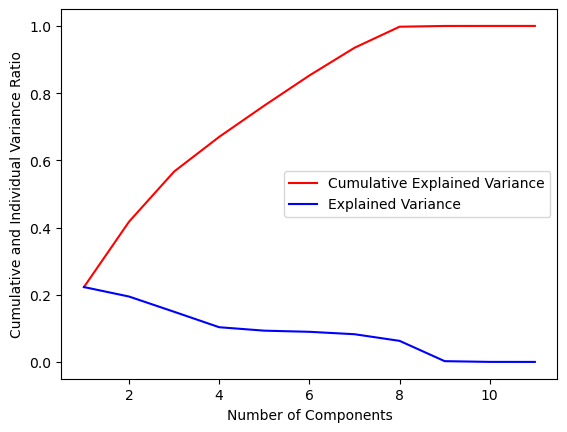

In [40]:
plt.plot(range(1,len(pca_model.explained_variance_ratio_ )+1),
         np.cumsum(pca_model.explained_variance_ratio_),
         c='red',
         label="Cumulative Explained Variance")
plt.plot(range(1,len(pca_model.explained_variance_ratio_)+1),
         pca_model.explained_variance_ratio_,
         c='blue',
         label="Explained Variance")
plt.legend()
plt.xlabel("Number of Components")
plt.ylabel("Cumulative and Individual Variance Ratio")
plt.show()